# KMeans with 1 variable

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('cluster_1_variable_example.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   true_group  15 non-null     object 
 1   x           15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [4]:
df

,true_group,x
0,A,-1.546339
1,A,-1.775880
2,A,-1.249187
3,A,-1.677143
4,A,-2.747398
5,B,0.756365
6,B,0.679823
7,B,0.045965
8,B,0.543803
9,B,-0.687950


Let's visualize the observations using a specialized scatter plot. This scatter plot is discussed in detail CMPINF 2130. The STRIP PLOT.

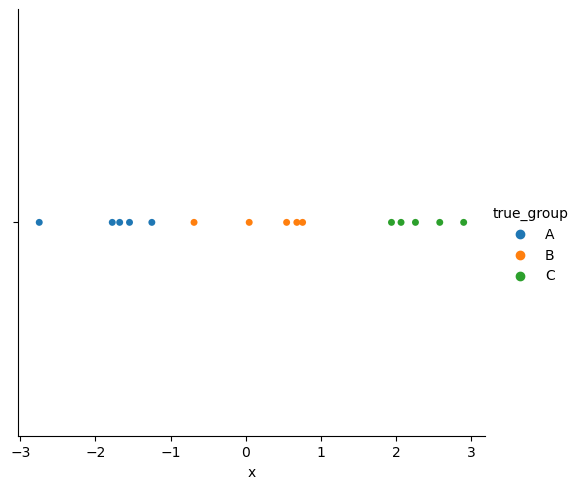

In [5]:
sns.catplot(data = df, x='x', hue='true_group', kind='strip', jitter=False)

plt.show()

Let's pretend we DO NOT know the groupings! Can we CLUSTER the observations just based on their VALUES!

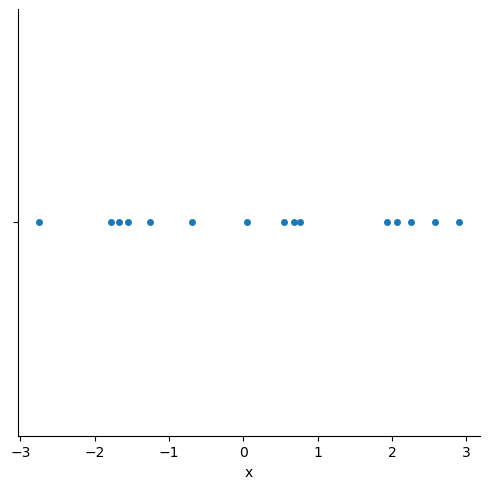

In [6]:
sns.catplot(data = df, x='x', kind='strip', jitter=False)

plt.show()

## KMeans

But before we can RUN KMeans...we need to organize the data appopriately. The function we will use WANTS NumPy arrays and NOT Pandas DataFrames.

The DataFrame NEEDS to be a 2D array.

In [7]:
df.x.to_numpy()

array([-1.54633927, -1.77588013, -1.24918706, -1.67714288, -2.74739841,
        0.75636481,  0.67982292,  0.04596469,  0.54380312, -0.68795048,
        2.58130181,  2.25782372,  1.93887976,  2.89935259,  2.06605957])

In [8]:
df.x.to_numpy().reshape(-1, 1)

array([[-1.54633927],
       [-1.77588013],
       [-1.24918706],
       [-1.67714288],
       [-2.74739841],
       [ 0.75636481],
       [ 0.67982292],
       [ 0.04596469],
       [ 0.54380312],
       [-0.68795048],
       [ 2.58130181],
       [ 2.25782372],
       [ 1.93887976],
       [ 2.89935259],
       [ 2.06605957]])

In [9]:
X = df.x.to_numpy().reshape(-1, 1)

In [10]:
X.ndim

2

In [11]:
X.shape

(15, 1)

In [12]:
X

array([[-1.54633927],
       [-1.77588013],
       [-1.24918706],
       [-1.67714288],
       [-2.74739841],
       [ 0.75636481],
       [ 0.67982292],
       [ 0.04596469],
       [ 0.54380312],
       [-0.68795048],
       [ 2.58130181],
       [ 2.25782372],
       [ 1.93887976],
       [ 2.89935259],
       [ 2.06605957]])

The FUNCTION to execute KMeans comes from the scikit-learn MODULE. scikit-learn is RARELY imported directly. Instead, we IMPORT FUNCTIONS from scikit-learn.

The function is named `KMeans()` and it comes from the `sklearn.cluster` module.

In [13]:
from sklearn.cluster import KMeans

In [14]:
%whos

Variable   Type         Data/Info
---------------------------------
KMeans     ABCMeta      <class 'sklearn.cluster._kmeans.KMeans'>
X          ndarray      15x1: 15 elems, type `float64`, 120 bytes
df         DataFrame       true_group         x\n<...>\n14          C  2.066060
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


ALL functions from scikit-learn follow the following recipe:

* INITIALIZE the object - specify the ASSUMPTIONS for how the method is executed  
* FIT the object - LEARN what you need to learn  
* PREDICT or TRANSFORM - return the VALUES you want from a FITTED object

Let's begin by INITIALIZING. The ASSUMPTIONS ARE:

* the number of clusters
* the random seed which controls the randomness - the initial guess
* the number of initial guesses
* the number of iterations for each initial guess

Let's begin with 3 clusters since we know there are in fact 3 groups in this small application.

In [15]:
km3 = KMeans( n_clusters=3, random_state=121, n_init=25, max_iter=500 )

In [16]:
type( km3 )

sklearn.cluster._kmeans.KMeans

We have not provided any DATA when we INITIALIZE!

We give the data when we FIT the object using the assumptions!

In [17]:
km3 = km3.fit( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For KMeans FITTING means it identified the CLUSTERS associated with EACH data point!

To RETURN the CLUSTER ASSIGNMENTS or CLUSTER LABELS...we need to PREDICT the data!!!!

In [18]:
km3.predict( X )

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1])

If you only care about the cluster ASSIGNMENTS or CLUSTER LABELS, FITTING and PREDICTING can be combined into a SINGLE action.

In [19]:
km3b = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500)

In [20]:
km3b.fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1])

Accomplish ALL 3 actions in 1 LINE of CODE!!!

In [21]:
KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1])

Let's use the INITIALIZE then FIT and PREDICT approach and study the cluster labels.

To do that, let's create a COPY of the original dataframe.

In [23]:
df_copy = df.copy()

In [24]:
df_copy

,true_group,x
0,A,-1.546339
1,A,-1.775880
2,A,-1.249187
3,A,-1.677143
4,A,-2.747398
5,B,0.756365
6,B,0.679823
7,B,0.045965
8,B,0.543803
9,B,-0.687950


Create a new column named `k3` which stores the RESULT of the KMeans cluster labels!

In [25]:
df_copy['k3'] = pd.Series( km3.fit_predict(X), index=df_copy.index )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
df_copy

,true_group,x,k3
0,A,-1.546339,0
1,A,-1.775880,0
2,A,-1.249187,0
3,A,-1.677143,0
4,A,-2.747398,0
5,B,0.756365,2
6,B,0.679823,2
7,B,0.045965,2
8,B,0.543803,2
9,B,-0.687950,0


In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   true_group  15 non-null     object 
 1   x           15 non-null     float64
 2   k3          15 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 428.0+ bytes


In [28]:
df_copy.nunique()

true_group     3
x             15
k3             3
dtype: int64

In [29]:
df_copy.k3.value_counts()

0    6
1    5
2    4
Name: k3, dtype: int64

In [30]:
df_copy.true_group.value_counts()

A    5
B    5
C    5
Name: true_group, dtype: int64

Color by the KMeans labels...

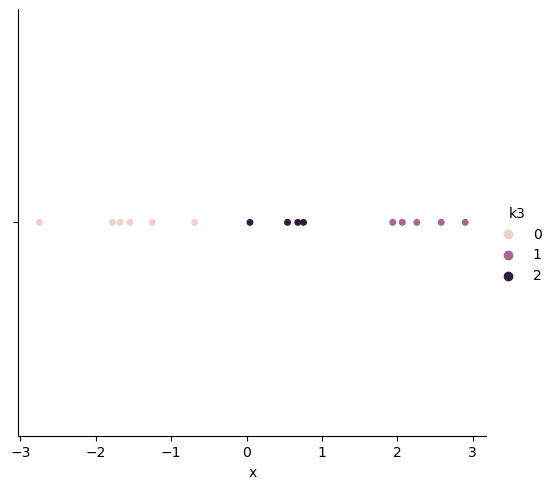

In [31]:
sns.catplot(data = df_copy, x='x', hue='k3', kind='strip', jitter=False)

plt.show()

I like to treat cluster labels as CATEGORICAL variables. Thus, let's CONVERT the integer to the CATEGORY data type!!!!!

The Pandas Category data type is a specialized data type for CATEGORICAL variables!!!!

In [32]:
df_copy['k3'] = df_copy.k3.astype('category')

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   true_group  15 non-null     object  
 1   x           15 non-null     float64 
 2   k3          15 non-null     category
dtypes: category(1), float64(1), object(1)
memory usage: 515.0+ bytes


In [34]:
df_copy.k3.cat.categories

Int64Index([0, 1, 2], dtype='int64')

In [35]:
df_copy.k3.value_counts()

0    6
1    5
2    4
Name: k3, dtype: int64

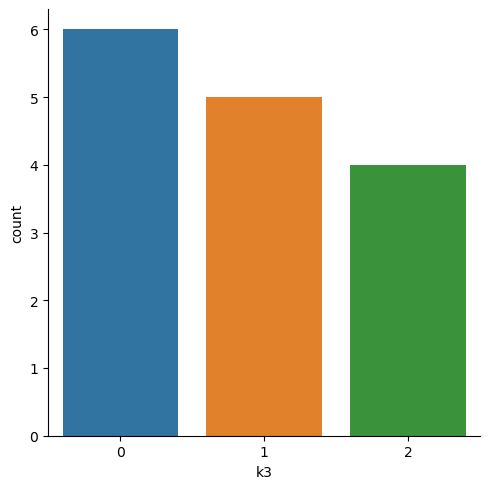

In [36]:
sns.catplot(data = df_copy, x='k3', kind='count')

plt.show()

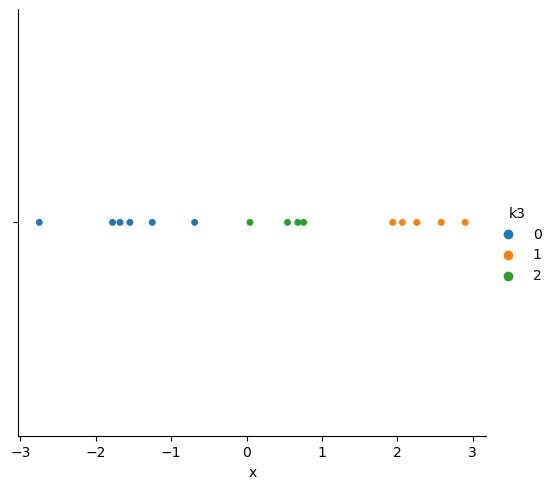

In [37]:
sns.catplot(data = df_copy, x='x', hue='k3', kind='strip', jitter=False)

plt.show()

### How do the KMeans results compare to the TRUE answers??

You can NEVER do this in a real data set!

However, you are clustering the ROWS based on NUMERIC COLUMNS. Thus, you are NOT using the categorical variables in the clustering! You can therefore compare the CLUSTER results with the known categories!!!

Could use DODGED bar chart, but I prefer to use HEAT MAPS!!!

In [38]:
pd.crosstab( df_copy.true_group, df_copy.k3 )

k3,0,1,2
true_group,,,
A,5,0,0
B,1,0,4
C,0,5,0


But...I like to include the TOTAL or MARGIN COUNTS!!!

In [39]:
pd.crosstab( df_copy.true_group, df_copy.k3, margins=True )

k3,0,1,2,All
true_group,,,,
A,5,0,0,5
B,1,0,4,5
C,0,5,0,5
All,6,5,4,15


But lets visualize within a HEAT MAP.

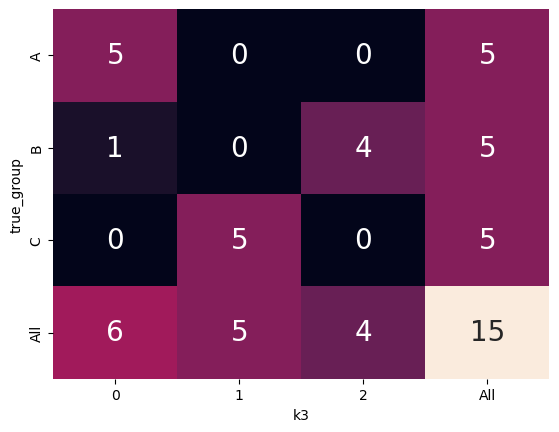

In [40]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_copy.true_group, df_copy.k3, margins=True),
            annot=True, annot_kws={'fontsize': 20},
            cbar=False,
            ax=ax )

plt.show()

KMeans has MIS LABELED or MIS IDENTIED 1 of the observations!

But...is KMeans WRONG??? NO!!!!!

KMeans groups by DISTANCE!! The closer observations are the more similar KMeans feels they are!!!

Let's visualize what caused the INCORRECT label...

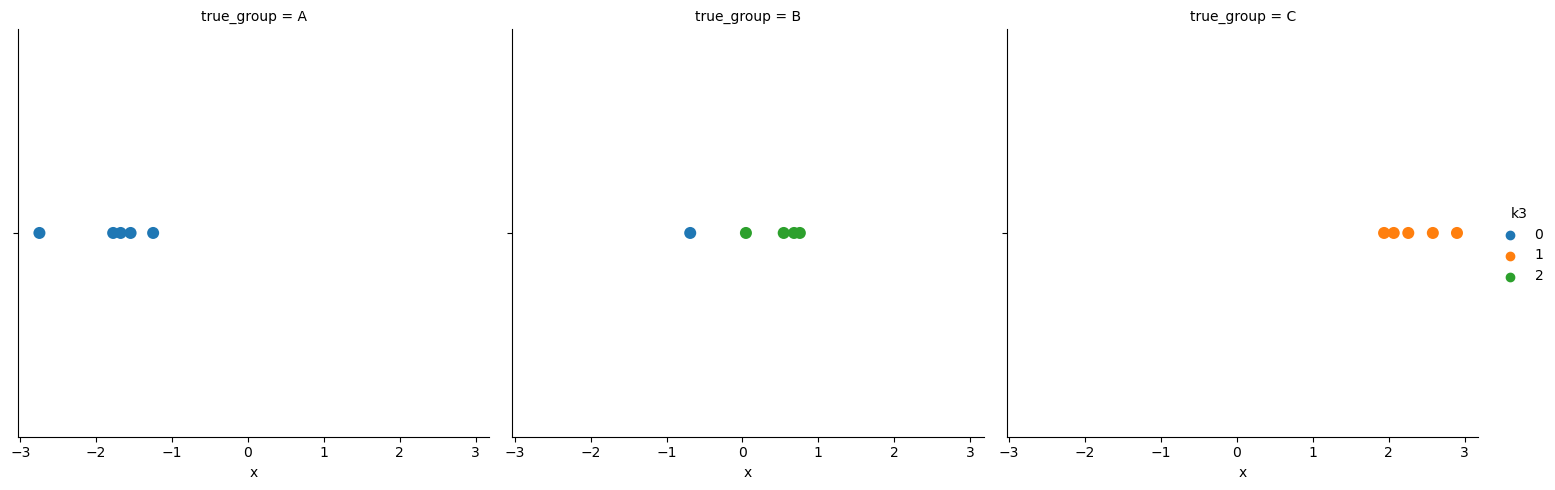

In [43]:
sns.catplot(data = df_copy, x='x', hue='k3', kind='strip', jitter=False,
            col='true_group', s=75)

plt.show()

Let's use the marker SHAPE via the `style` argument in `sns.relplot()`.

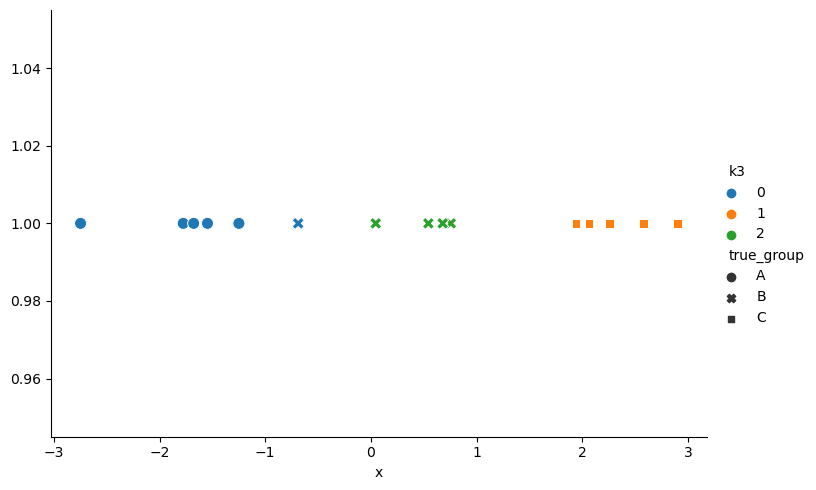

In [45]:
sns.relplot(data = df_copy, x='x', y=1, hue='k3', style='true_group', aspect=1.5, s=75)

plt.show()

## More clusters

Let's try 8 clusters!

In [46]:
km8 = KMeans(n_clusters=8, random_state=121, n_init=25, max_iter=500)

In [47]:
df_copy['k8'] = pd.Series( km8.fit_predict( X ), index=df_copy.index )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   true_group  15 non-null     object  
 1   x           15 non-null     float64 
 2   k3          15 non-null     category
 3   k8          15 non-null     int32   
dtypes: category(1), float64(1), int32(1), object(1)
memory usage: 575.0+ bytes


In [49]:
df_copy.k8.value_counts()

4    3
2    3
1    3
5    2
0    1
3    1
7    1
6    1
Name: k8, dtype: int64

In [50]:
df_copy['k8'] = df_copy.k8.astype('category')

In [51]:
df_copy.dtypes

true_group      object
x              float64
k3            category
k8            category
dtype: object

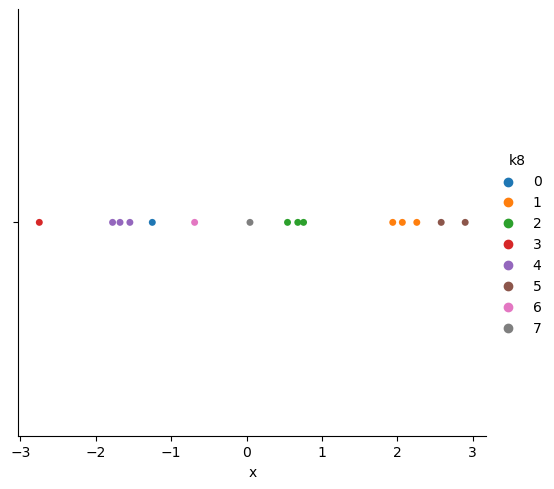

In [52]:
sns.catplot(data = df_copy, x='x', hue='k8', kind='strip', jitter=False)

plt.show()

The MAX number of clusters equals the NUMBER OF ROWS in the data set!

This would give 1 observation PER cluster!!!!

In [53]:
km15 = KMeans(n_clusters=15, random_state=121, n_init=25, max_iter=500)

In [54]:
df_copy['k15'] = pd.Series( km15.fit_predict( X ), index=df_copy.index )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   true_group  15 non-null     object  
 1   x           15 non-null     float64 
 2   k3          15 non-null     category
 3   k8          15 non-null     category
 4   k15         15 non-null     int32   
dtypes: category(2), float64(1), int32(1), object(1)
memory usage: 954.0+ bytes


In [56]:
df_copy.nunique()

true_group     3
x             15
k3             3
k8             8
k15           15
dtype: int64

In [57]:
df_copy['k15'] = df_copy.k15.astype('category')

In [58]:
df_copy.k15.value_counts()

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: k15, dtype: int64

## Optimal number of clusters

We want to find the TOTAL WITHIN SUM of SQUARES that gives "INTERESTING" behavior!!!

We must calculate the TOTAL WITHIN SUM of SQUARES for MANY possible number of clusters!!!!!

The `KMeans()` objects refer to the TOTAL WITHIN SUM of SQUARES as the `.inertia_` attribute.

We want to MINIMIZE the "INERTIA" but only to an "INTERESTING" level!

In [59]:
tots_within = []

K = range(1, df_copy.shape[0]+1)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( X )
    
    tots_within.append( km.inertia_ )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:13

In [60]:
tots_within

[46.35399636931193,
 10.655278557432908,
 3.2293944877041727,
 1.6878380093038048,
 1.063014909569858,
 0.5517322559171765,
 0.2824165169327671,
 0.15183268233008237,
 0.10125453161699273,
 0.05778406841556978,
 0.036142712893640266,
 0.0158912049929993,
 0.007803852442986431,
 0.0029293308150693254,
 0.0]

Visualize the RESULTS using a LINE CHART.

This is a simple graphic that I typically make in matplotlib rather than Seaborn. The style of the line chart is the SAME style that we used at the beginning semeseter when we plotting the SEM vs the sample size.

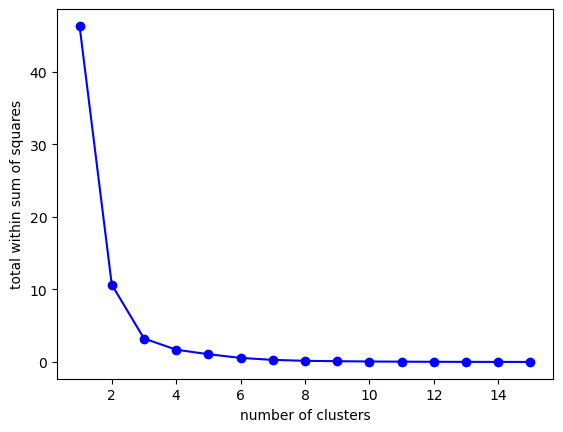

In [61]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

# KMeans with 2 variables

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
df = pd.read_csv('cluster_2_variables_example.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x1          300 non-null    float64
 1   x2          300 non-null    float64
 2   true_group  300 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [4]:
df.dtypes

x1            float64
x2            float64
true_group     object
dtype: object

In [5]:
df.isna().sum()

x1            0
x2            0
true_group    0
dtype: int64

In [6]:
df.nunique()

x1            300
x2            300
true_group      5
dtype: int64

In [7]:
df.true_group.value_counts()

A    60
E    60
D    60
B    60
C    60
Name: true_group, dtype: int64

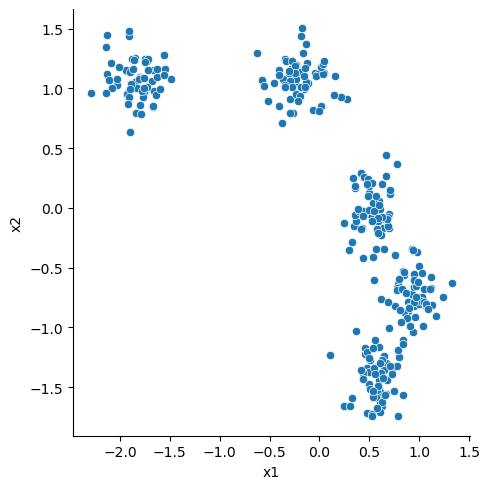

In [8]:
sns.relplot(data = df, x='x1', y='x2')

plt.show()

Color by the TRUE KNOWN groupings.

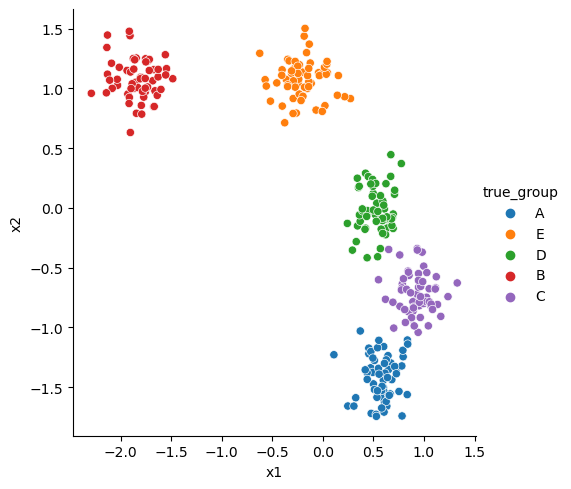

In [9]:
sns.relplot(data = df, x='x1', y='x2', hue='true_group')

plt.show()

## KMeans

Let's prepare the data as required by scikit-learn.

In [10]:
X = df.select_dtypes('number').copy().to_numpy()

In [11]:
X.shape

(300, 2)

In [12]:
from sklearn.cluster import KMeans

INITIIALIZE, FIT, and PREDICT!!!

But let's do ALL ACTIONS in a single line of code!!

We know there are 5 groupings, so let's use 5 clusters!

In [13]:
clusters_5 = KMeans( n_clusters=5, random_state=121, n_init=25, max_iter=500 ).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Now, assign the CLUSTER LABELS to a copied DataFrame.

In [14]:
df_copy = df.copy()

In [15]:
df_copy['k5'] = pd.Series( clusters_5, index=df_copy.index ).astype('category')

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   x1          300 non-null    float64 
 1   x2          300 non-null    float64 
 2   true_group  300 non-null    object  
 3   k5          300 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 7.7+ KB


In [17]:
df_copy.nunique()

x1            300
x2            300
true_group      5
k5              5
dtype: int64

In [18]:
df_copy.k5.value_counts()

2    61
1    60
3    60
4    60
0    59
Name: k5, dtype: int64

In [19]:
df_copy.true_group.value_counts()

A    60
E    60
D    60
B    60
C    60
Name: true_group, dtype: int64

Let's visualize the cluster results on a scatter plot.

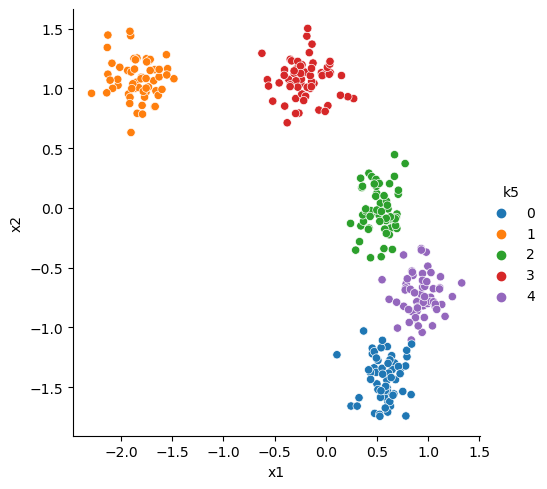

In [20]:
sns.relplot(data = df_copy, x='x1', y='x2', hue='k5')

plt.show()

Let's use a HEAT MAP to COMPARE the cluster labels with the KNOWN true groupings!

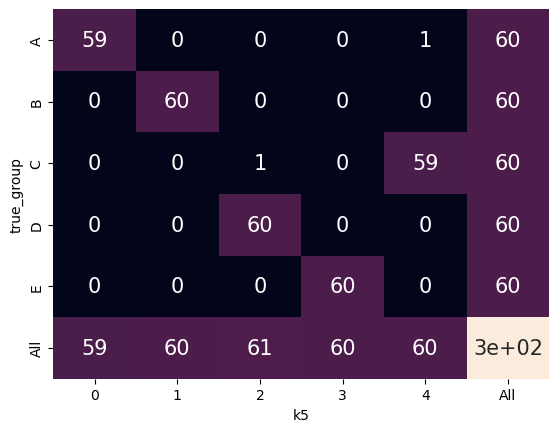

In [21]:
fig, ax = plt.subplots()

sns.heatmap( data = pd.crosstab( df_copy.true_group, df_copy.k5, margins=True ),
             annot=True, annot_kws={'fontsize': 15},
             cbar=False,
             ax=ax )

plt.show()

Let's use the Marker SHAPE via the `style` argument in `sns.relplot()` to check which specific data points are mis labeled.

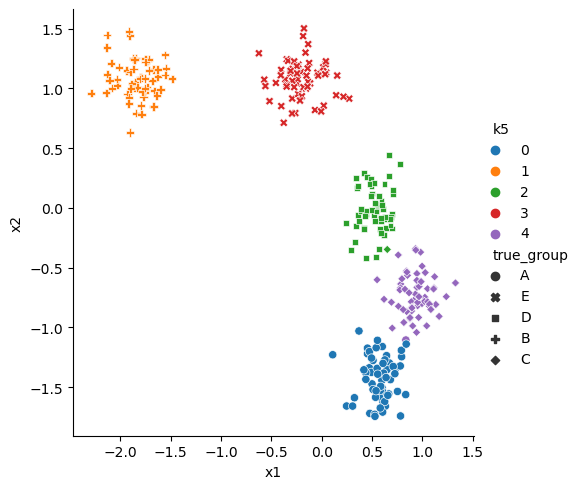

In [22]:
sns.relplot(data = df_copy, x='x1', y='x2', hue='k5', style='true_group')

plt.show()

KMeans has NO KNOWLEDGE of the groupings! It's clustering ONLY based on the numeric columns!!!!!!!!!!

## What if we did NOT know the number of clusters to try?

I always recommend starting out with 2 clusters!!! You should do this just to see what happens!!!!

In [23]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( X )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
df_copy['k2'] = pd.Series( clusters_2, index=df_copy.index ).astype('category')

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   x1          300 non-null    float64 
 1   x2          300 non-null    float64 
 2   true_group  300 non-null    object  
 3   k5          300 non-null    category
 4   k2          300 non-null    category
dtypes: category(2), float64(2), object(1)
memory usage: 8.1+ KB


In [26]:
df_copy.k2.value_counts()

0    180
1    120
Name: k2, dtype: int64

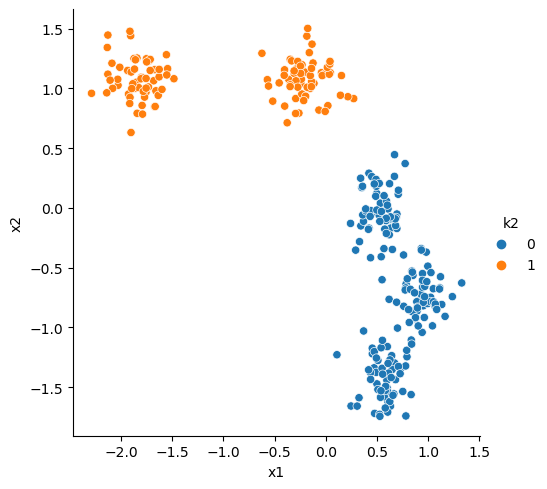

In [27]:
sns.relplot(data = df_copy, x='x1', y='x2', hue='k2')

plt.show()

## Optimal number of clusters

You do NOT need to manually try out many different number of clusters.

Try 2 clusters. Then try one more representative number based on your exploration OR based on some known grouping.

Then use the KNEE BEND plot to figure out a "better" number of clusters.

In [28]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit( X )
    
    tots_within.append( km.inertia_ )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:13

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Visualize the KNEE BEND plot as a line chart.

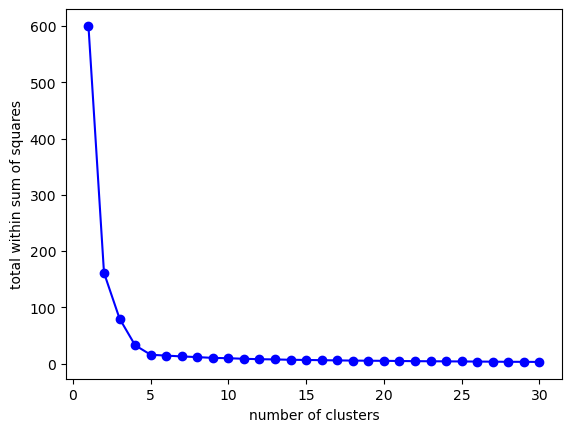

In [30]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()